# Ce notebook est la consolidation du systéme de clustering basée dans la technique T2F.
T2F est une des deux techniques qu'on propose dans le cadre du projet fil rouge.

Un example avec > 44000 pixels

# Here, change the local Python PATH !!!

In [2]:
import sys

In [3]:
PATH_TO_PYTHON = "/home/julian/FilRouge_territoires"

In [4]:
sys.path
# append in the first position of the list
sys.path.insert(0, PATH_TO_PYTHON)
sys.path

['/home/julian/FilRouge_territoires',
 '/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages']

In [5]:
import pickle
import numpy as np
from models.our_t2f import Time2Feature
from notebooks.cookie_clusters import find_num_clusters
from notebooks.cookie_clusters import afficheur_de_resultats

# Importing the pixels

## Cropping the images

In [14]:
!cd .. ; make create_data


Cleaning data directory...
Removing data/processed directory...
Removing data/with_texture directory...
Removing data/cropped directory...
Executing crop_images.py file
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180) (971, 2180)
(971, 2180) (971, 2180) (971, 2180) (97

## Using our T2F implementation

In [6]:
data_cube = np.loadtxt('../data/processed/(1000, 141, 8).csv', delimiter=",").astype(np.float32)
data_cube = data_cube.reshape(1000, 141, 8)

In [7]:
t2f = Time2Feature(data_cube=data_cube,
                   model_type='Hierarchical',
                   transform_type='minmax',
                   batch_size=100,
                   n_cores=6)

In [9]:
t2f._feature_extraction()

Doing feature extraction


Feature Extraction: 100%|██████████| 800/800 [01:02<00:00, 12.89it/s]

Feature Extraction: 100%|██████████| 536/536 [00:40<00:00, 13.09it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_133353/3809561393.py", line 1, in <module>
    t2f._feature_extraction()
  File "/home/julian/FilRouge_territoires/models/our_t2f.py", line 61, in _feature_extraction
  File "/home/julian/FilRouge_territoires/t2f/extraction/extractor.py", line 163, in feature_extraction
    extraction_feats = pool.starmap(feature_extraction_simple, list_arguments)
  File "/home/julian/miniconda3/envs/FilRouge/lib/python3.9/multiprocessing/pool.py", line 372, in starmap
    return self._map_async(func, iterable, starmapstar, chunksize).get()
  File "/home/julian/miniconda3/envs/FilRouge/lib/python3.9/multiprocessing/pool.py", line 765, in get
    self.wait(timeout)
  File "/home/julian/miniconda3/envs/FilRouge/lib/python3.9/multiprocessing/pool.py", line 762, in w

In [ ]:
t2f._feature_selection()

The shape of the dataset after the feature selection is (800, 253)


In [ ]:
t2f._n_clusters()

you have not specified the number of clusters.
Finding the number of clusters...
We are going to use 7 clusters.


In [ ]:
yhat = t2f._clustering()

Executing Hierarchical clustering...
End of clustering.


In [8]:
file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

In [ ]:
len(pixels_de_interet)

800

In [ ]:
np.unique(yhat)

array([0, 1, 2, 3, 4, 5, 6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


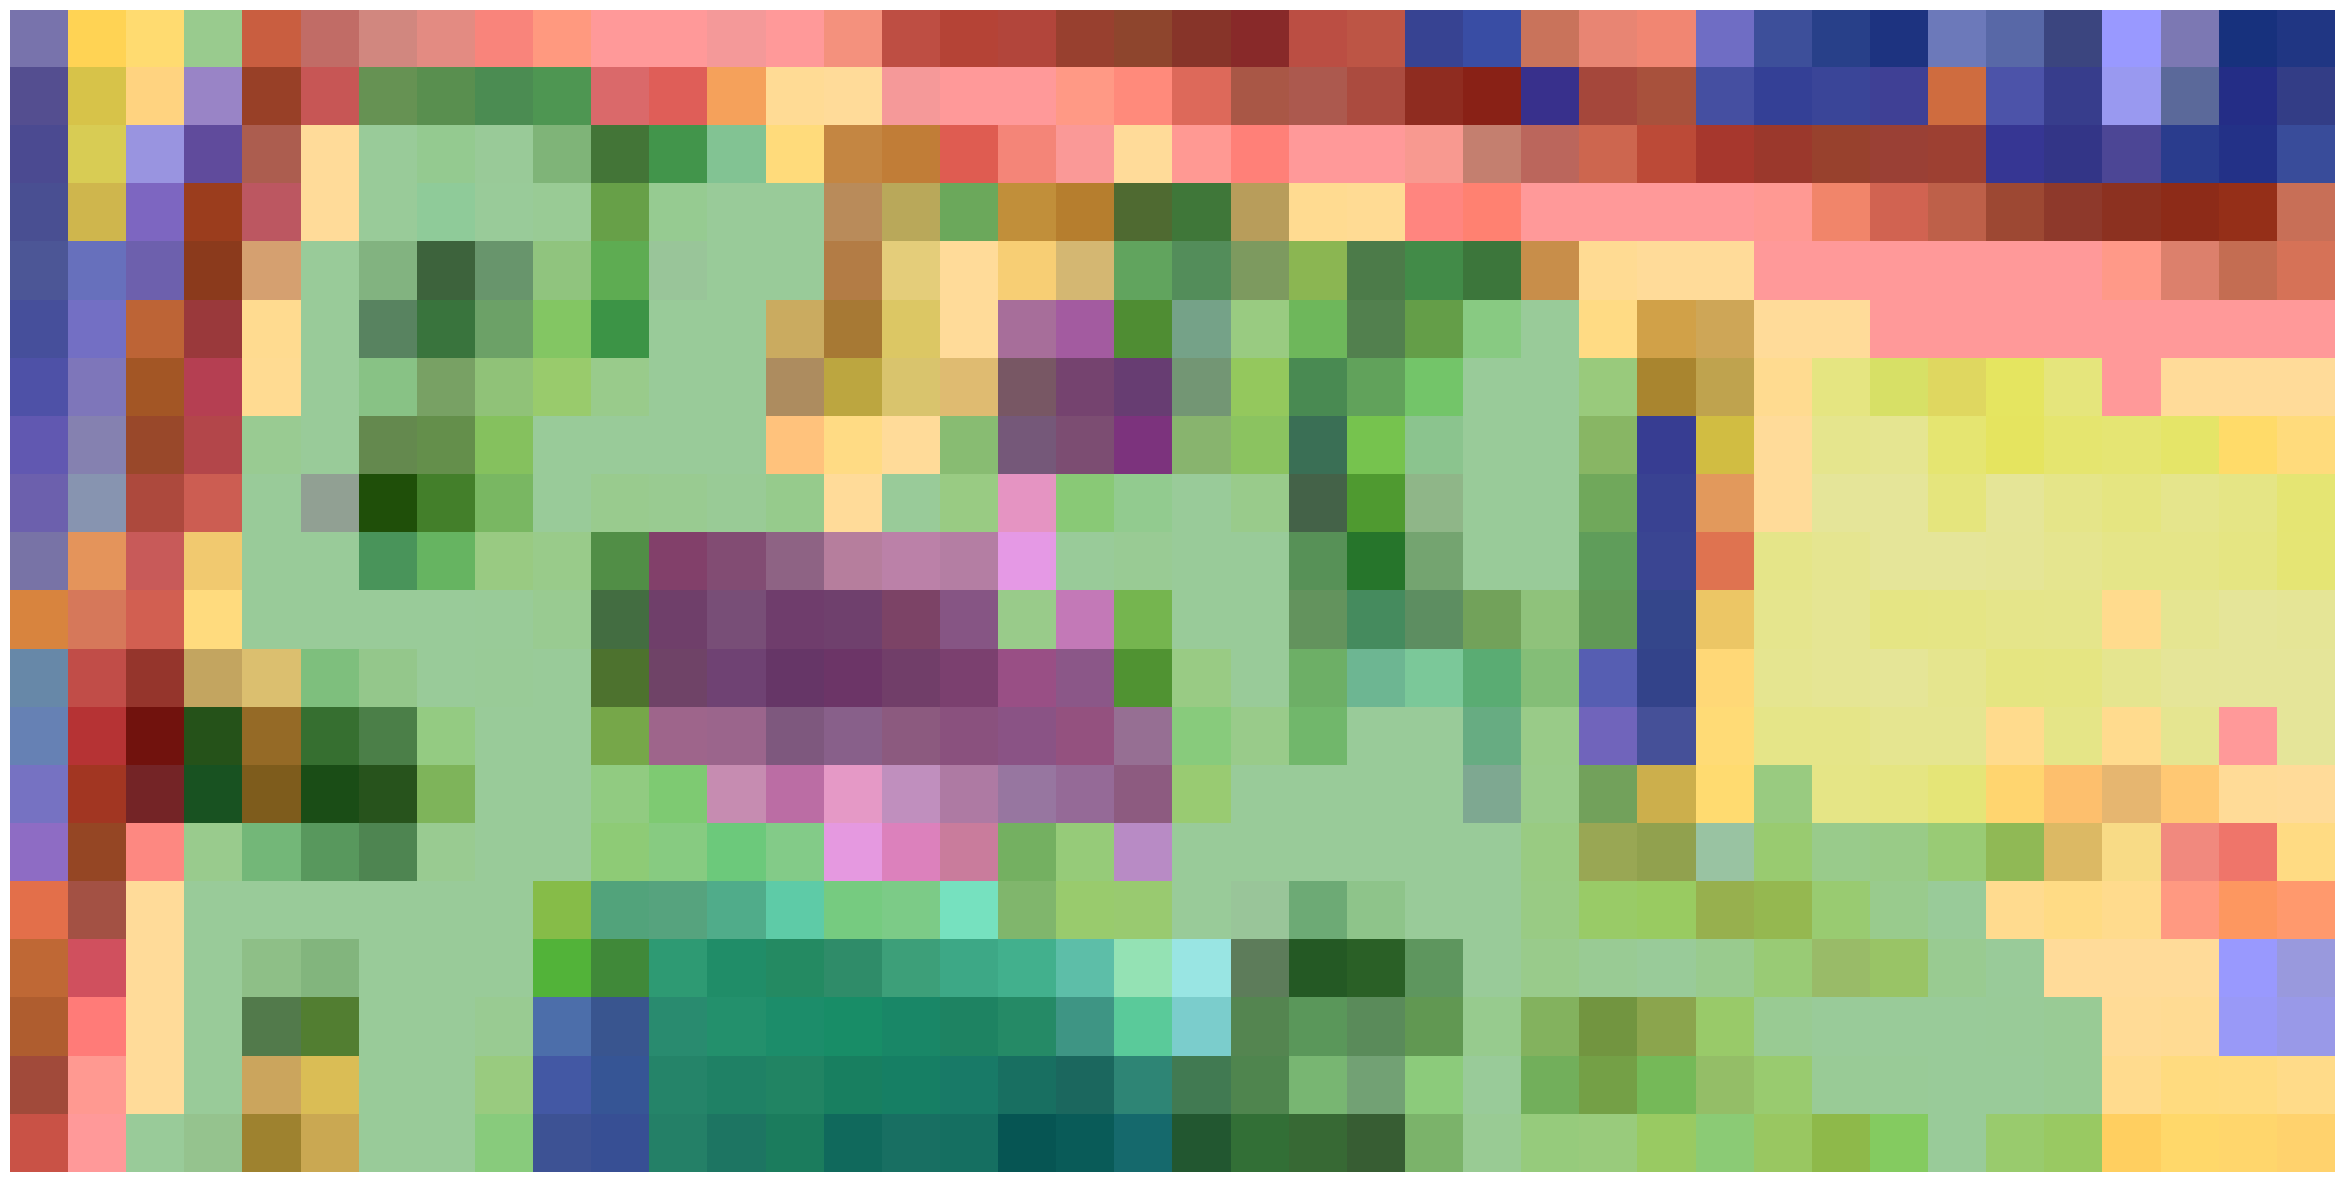

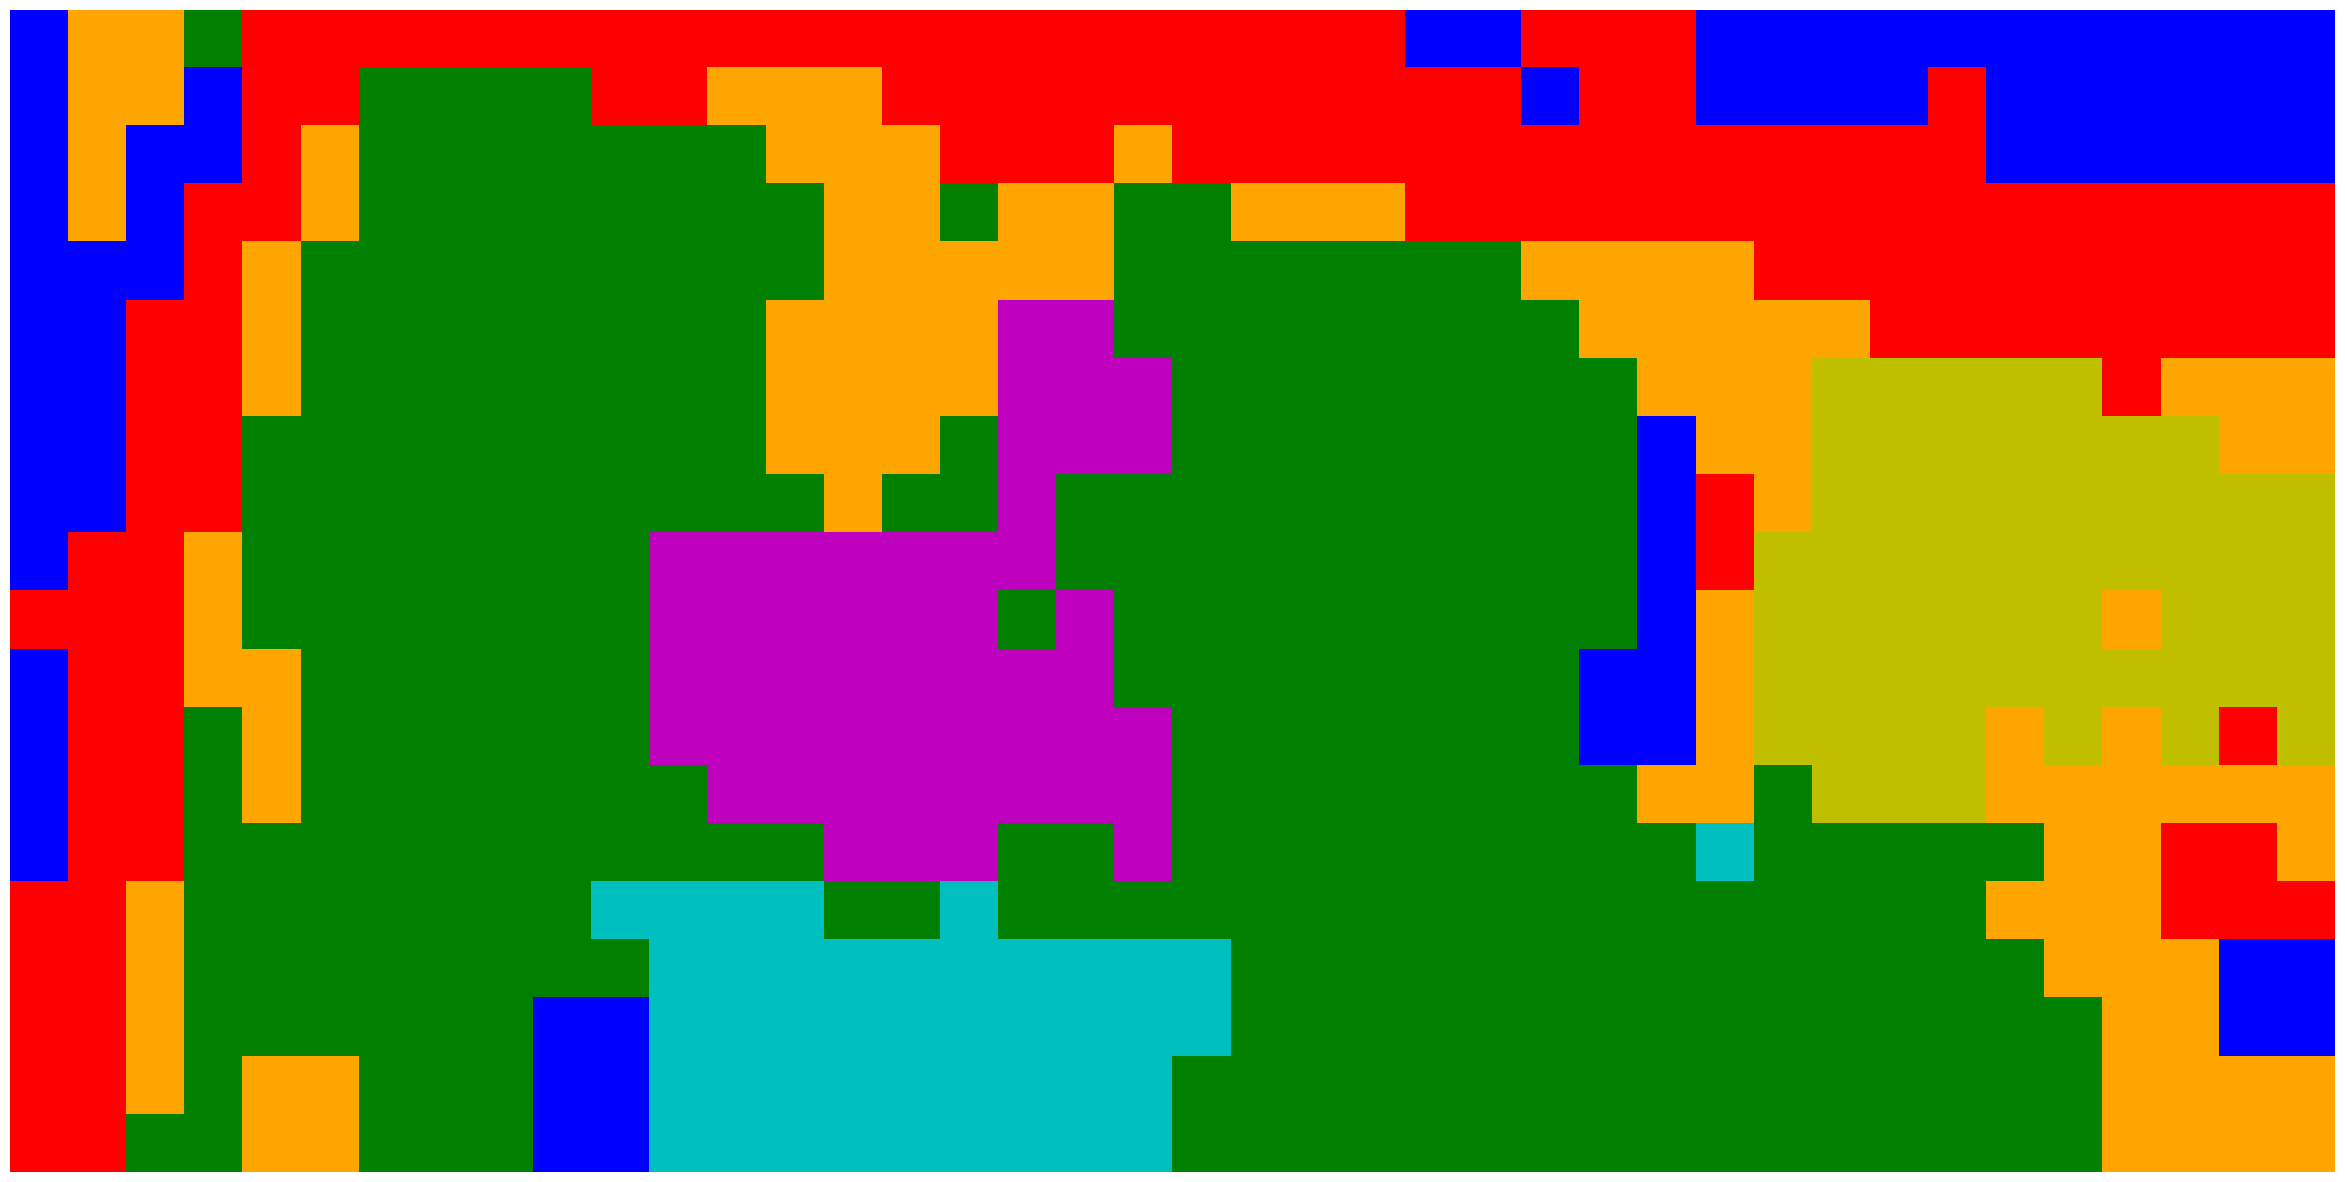

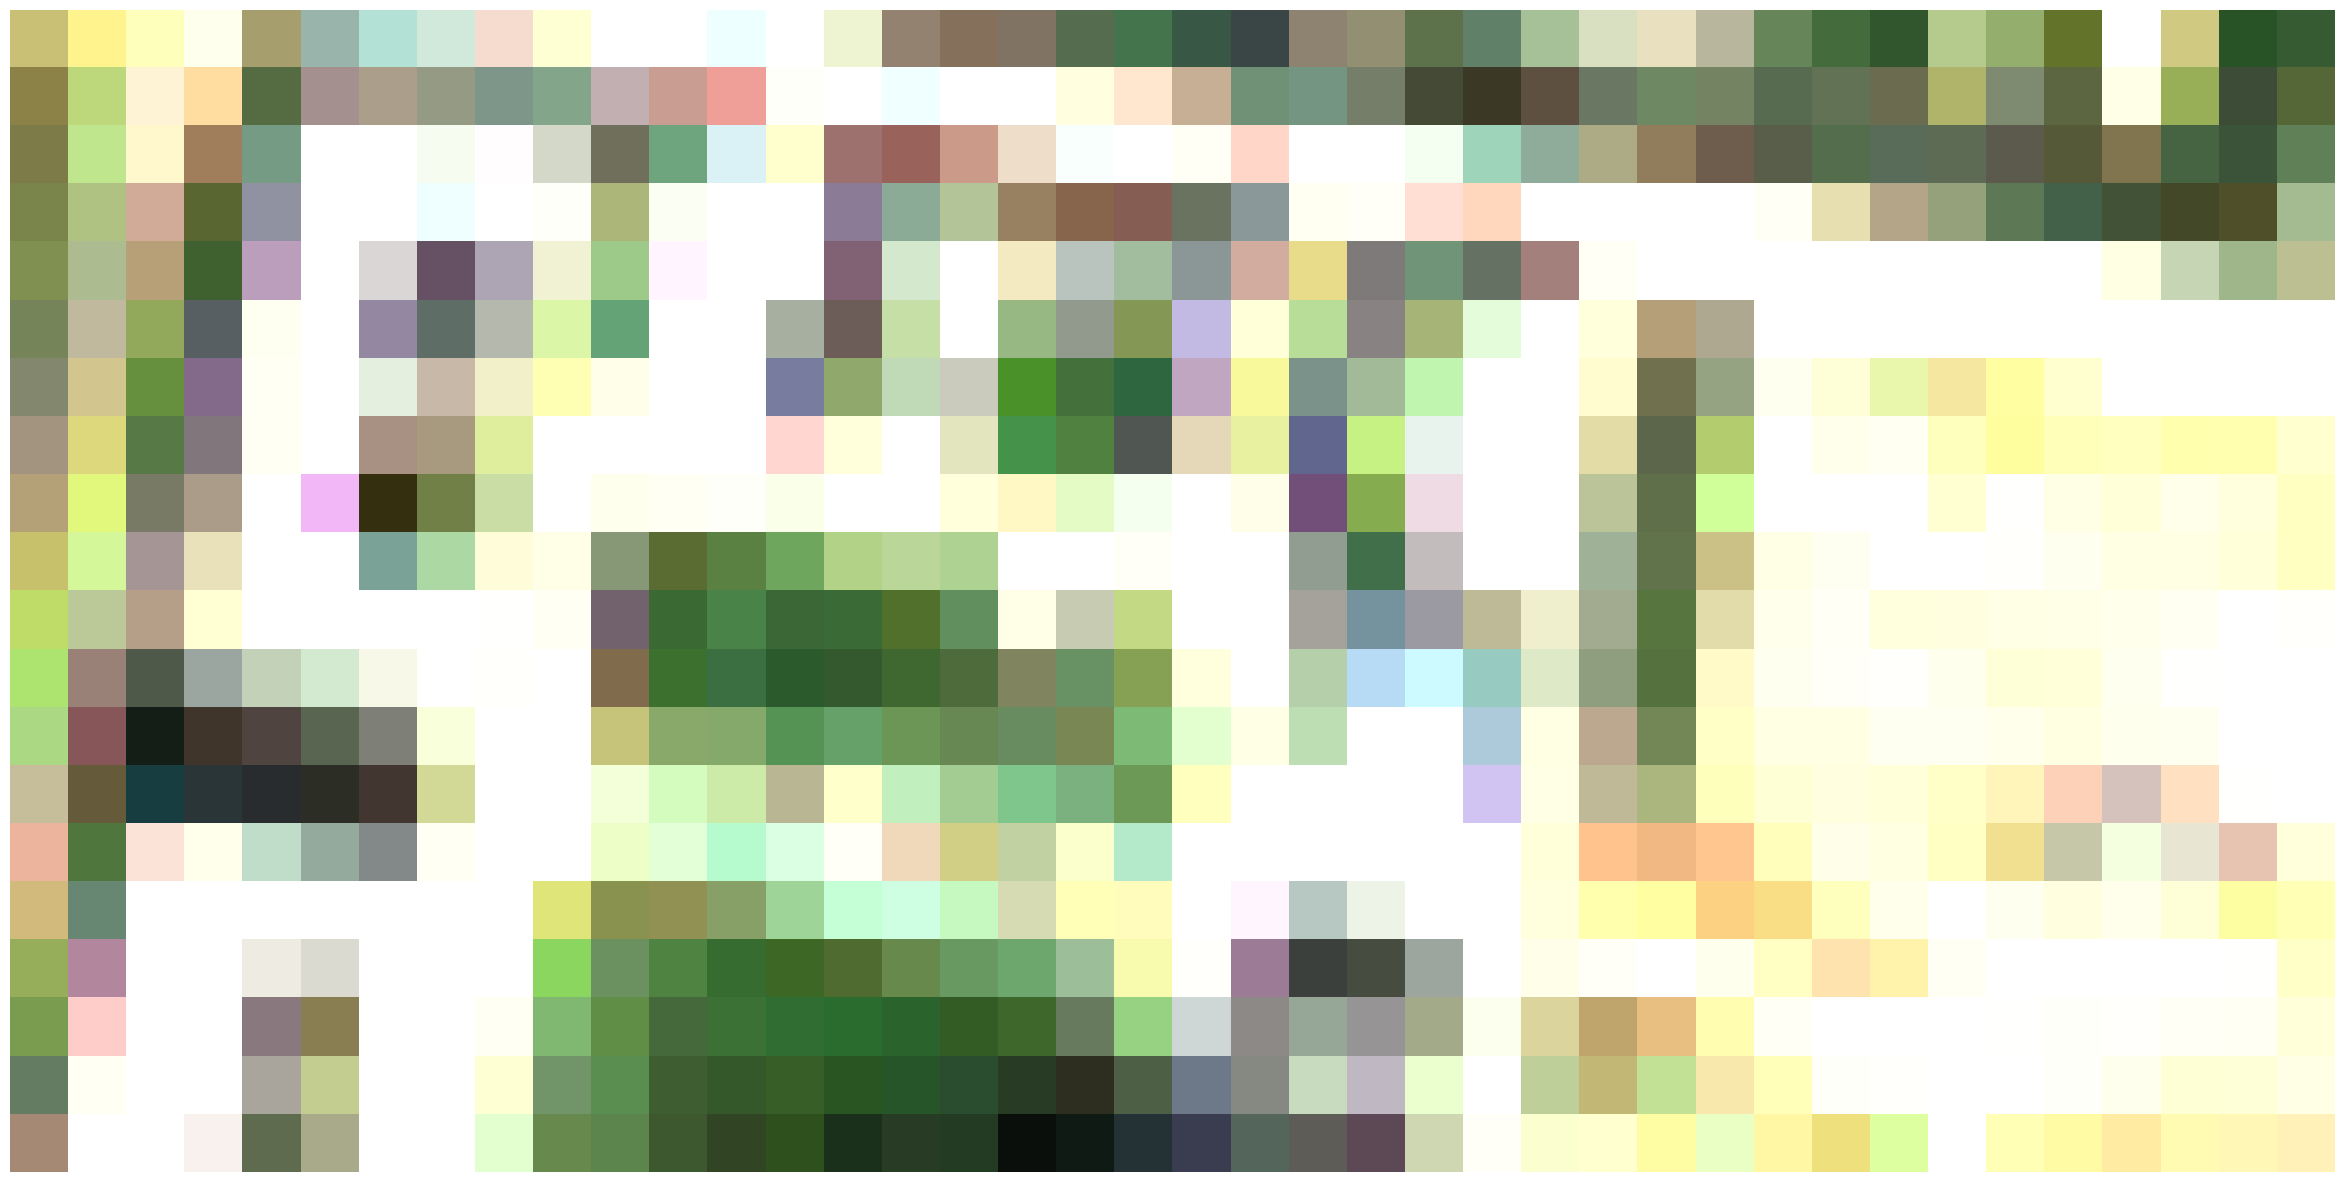

In [ ]:
PATH_IMAGE = "../data/cropped/cropped_with_texture_crop_SENTINEL2B_20231007-105728-915_L2A_T31UDQ_C_V3-1.tif"

results = afficheur_de_resultats(PATH_IMAGE, yhat, pixels_de_interet)
results.create_image('../results/test_of_pipeline', cbar=False, axes=False)